Notes taken from:

Learning Path: Deep Dive into Python Machine Learning, presented by Eder Santana, Chapter 4

by Ankita Thakur - Curator

Published by Packt Publishing, 2016

Learn what is Deep Learning, using Pure Theano for Optimizing a Simple Model

In [1]:
%matplotlib  inline
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt

import theano
from theano import tensor as T, function

from IPython import display
import time

## A simple problem

In [2]:
noise_var = 0.5 # noise variance, controls how hard is the problem, the larger the harder
n_samples = 1000 # number of observations

n = np.random.normal(0, noise_var, n_samples)
x = np.arange(n_samples)
x = (x - x.mean())/ x.std() # always a good practice to standardize the input data
w, b = np.random.randn(2)

d = w*x + b # correct answer
y = d + n # noisy observations (simulate a real environment)

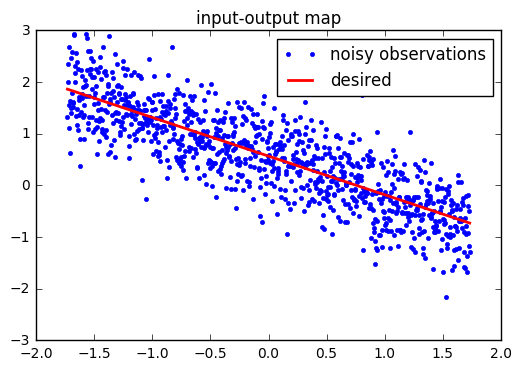

In [3]:
plt.plot(x, y, '.')
plt.plot(x, d, '-r', linewidth=2.)
plt.legend(('noisy observations', 'desired'))
plt.title('input-output map')

## Theano model

In [4]:
X, Y = T.vectors('input', 'desired') # X and Y are 2 symbolic variables
# shared variable use lower case letters for numpy arrays, initialized value in parentheses
W = theano.shared(.01)  # shared variables have to live in memory, either CPU and GPU, we want to optimize them
B = theano.shared(0.)  # we want to change them in-place to be faster
Z = W*X + B  # symbolic expression
Cost = ((Y-Z)**2).mean() # cost function is the mean squared value, Y is desired value, output is Z
params = [W, B] # parameters that should be learned are put in a list

## Changing Theano variables in place

In [5]:
W.get_value()

array(0.01)

In [6]:
W  # a theano shared variable

<TensorType(float64, scalar)>

In [7]:
updates = ((W, W*2), )  # We want the new value of W to be twice of previous value
double_w = function([], [], updates=updates)

In [8]:
double_w()  # idea of changing variables in-place
W.get_value()

array(0.02)

## Training the model

In [9]:
# Optimize parameters of model
# cost = (d-y)**2
#
# updates:
# w = w = lr*grad(cost, w) = w + lr*2*(d-y)*x
# b = b - lr*grad(cost, b) = b + lr*2*(d-y)

lr = .1
grads = [T.grad(Cost, p) for p in params]
updates = [(p, p - lr*g) for p, g in zip(params, grads)]  # a step in the direction of the gradient scaled by learning rate is lr*g

print(updates)

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [10]:
train = function([X, Y], Cost, updates=updates)         #Y  is desired values

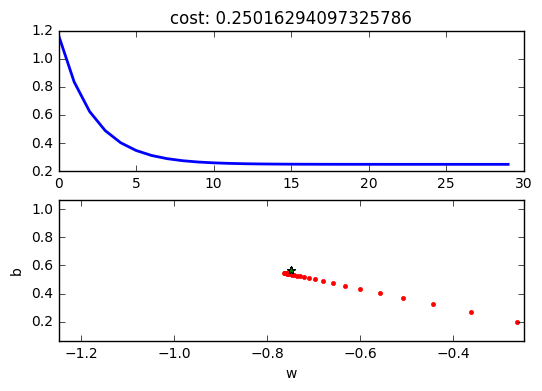

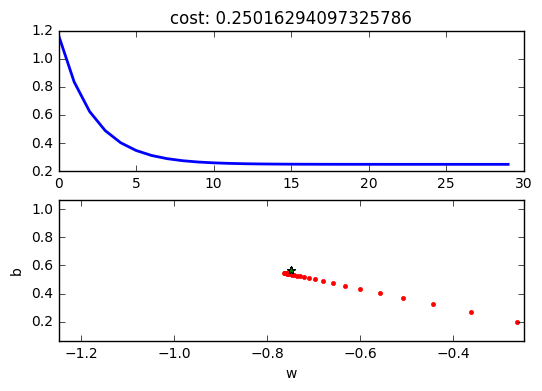

In [11]:
# Use the entire dataset
epochs = 30
final_cost = []
for i in range(epochs):  
    # for inp, out in zip(x, y):
        #This is all we need to train the model, to call train()
        final_cost.append(train(x,y))
        
        ### Extra niceties ###
        what, bhat = W.get_value(), B.get_value()
        
        # cost function
        plt.subplot(211)
        plt.cla()
        plt.title('cost: {}'.format(final_cost[-1]))
        plt.plot(final_cost, linewidth=2.)
        
        # parameter space
        plt.subplot(212)
        plt.plot(w, b, '*', linewidth=2.)
        plt.plot(what, bhat, '.r', linewidth=2.)
        plt.xlim([w-.5, w+.5])
        plt.ylim([b-.5, b+.5])
        plt.xlabel('w')
        plt.ylabel('b')
        
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1.0)
        
        
        
        
        
# Cost function is the learning curve
# Red dots are current values of adaptive model as it takes gradient descent steps, moving towards the black star

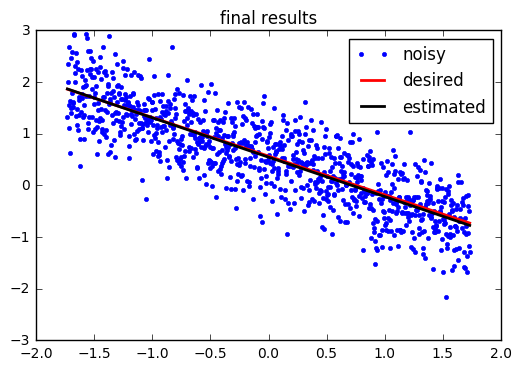

In [12]:
# estimated line

plt.title('final results')
plt.plot(x, y, '.')
plt.plot(x, d, 'r', linewidth=2.)
plt.plot(x, what*x + bhat, 'k', linewidth=2.)
plt.legend(('noisy', 'desired', 'estimated'))

# blue dots are observed values, estimated black line is close to original red line (but we never saw red line only the noisy blue)